# EDA (자치구별 상권 상관관계)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#환경 설정
plt.rcdefaults()
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## 1. 데이터 준비

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,...,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,24.0,52.0,1.671959e+11,15904.0,2.587177,1001496,11680,강남구
1,1,1,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.000000,5.273471e+08,8221.0,242.0,1.546181e+11,24375.0,3.026257,1001495,11710,송파구
2,2,2,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.000000,1.120979e+08,1924.0,327.0,2.592398e+11,32935.0,2.081362,1001494,11110,종로구
3,3,3,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.000000,2.379674e+08,2427.0,165.0,2.466393e+11,6054.0,2.107308,1001493,11140,중구
4,4,4,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,1104.0,593.0,3.766214e+11,104830.0,2.163080,1001492,11140,중구


In [5]:
# (row, column)
df.shape

(32912, 1512)

In [6]:
# 결측치 확인
n_of_nulls = df.isnull().sum().sum()
print("결측치 수 : ", n_of_nulls)

결측치 수 :  0


In [7]:
# column 확인

df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '기준_년_코드', '기준_분기_코드', '상권코드_0', '상권코드_1',
       '상권코드_2', '상권코드_3', '상권코드_4', '상권코드_5',
       ...
       '아파트_평균_면적', '아파트_평균_시가', '총 상주인구 수', '집객시설_수', '당월_매출_금액', '총_직장_인구_수',
       '폐업률', '상권_코드', '시군구_코드', '자치구_명'],
      dtype='object', length=1512)

## 2. 상관관계 (자치구별, 강남구)

In [8]:
# 자치구 종류
df['자치구_명'].unique()

array(['강남구', '송파구', '종로구', '중구', '용산구', '강동구', '서초구', '관악구', '동작구',
       '영등포구', '금천구', '구로구', '강서구', '양천구', '마포구', '서대문구', '은평구', '노원구',
       '도봉구', '강북구', '성북구', '중랑구', '동대문구', '광진구', '성동구'], dtype=object)

In [13]:
# '강남구'만 우선 추출
df_0 = df[df['자치구_명'] == '강남구']

In [14]:
df_0.head()

,Unnamed: 0,Unnamed: 0.1,기준_년_코드,기준_분기_코드,상권코드_0,상권코드_1,상권코드_2,상권코드_3,상권코드_4,상권코드_5,...,아파트_평균_면적,아파트_평균_시가,총 상주인구 수,집객시설_수,당월_매출_금액,총_직장_인구_수,폐업률,상권_코드,시군구_코드,자치구_명
0,0,0,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,24.0,52.000000,1.671959e+11,15904.0,2.587177,1001496,11680,강남구
20,20,20,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,7.0,4.000000,3.526016e+09,138.0,2.941176,1001475,11680,강남구
21,21,21,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,67.000000,6.392237e+08,241.0,7.000000,1.162736e+10,57.0,0.000000,1001474,11680,강남구
22,22,22,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.273333,2.942853e+08,171.0,3.000000,2.568207e+09,48.0,2.272727,1001473,11680,강남구
23,23,23,2020.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115.000000,5.125152e+08,85.0,37.766667,3.596760e+09,85.0,5.882353,1001472,11680,강남구


### (1) 폐업률 - 유동인구

상관계수 : 0.009650046053826165
p-value : 0.6275627772306647


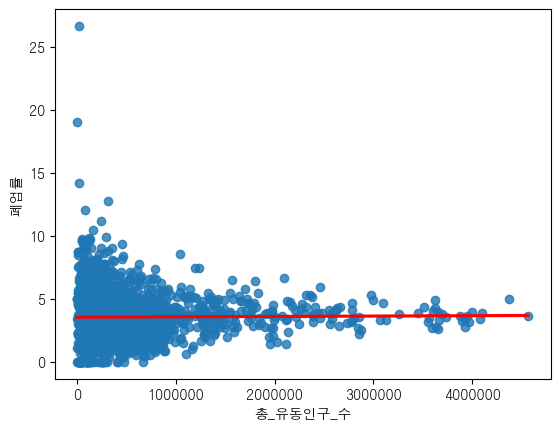

In [15]:
y = df_0['폐업률']
x = df_0['총_유동인구_수']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

### (2) 폐업률 - 아파트 단지 수

상관계수 : 0.03672030060260281
p-value : 0.06478942888973933


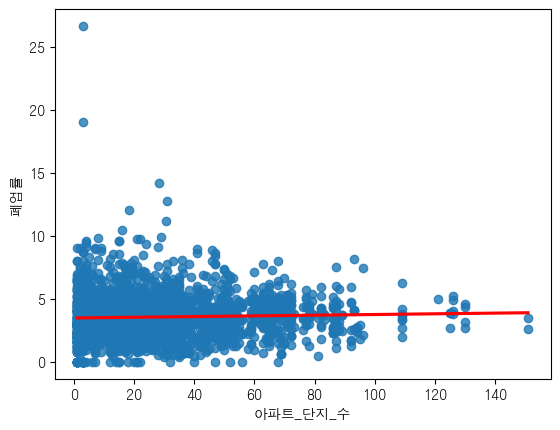

In [16]:
y = df_0['폐업률']
x = df_0['아파트_단지_수']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))


### (3) 폐업률 - 아파트 평균 면적

상관계수 : -0.05186085745771868
p-value : 0.009080158039196614


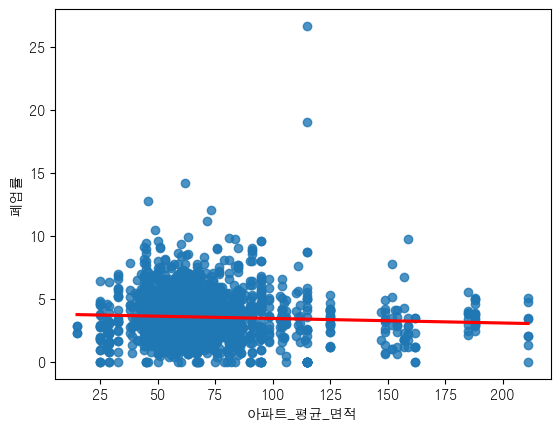

In [17]:
y = df_0['폐업률']
x = df_0['아파트_평균_면적']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

### (4) 폐업률 - 아파트 평균 시가

상관계수 : -0.08598445119804725
p-value : 1.4855100122152779e-05


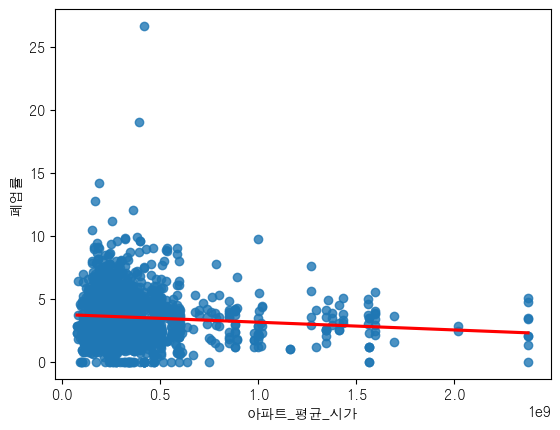

In [18]:
y = df_0['폐업률']
x = df_0['아파트_평균_시가']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

### (5) 폐업률 - 총 상주 인구

상관계수 : 0.05087053021437636
p-value : 0.010493309920882753


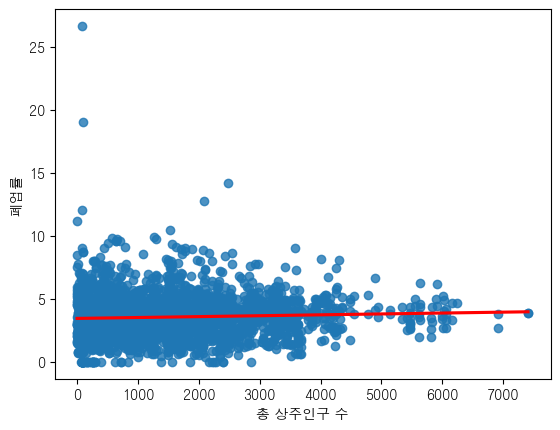

In [19]:
y = df_0['폐업률']
x = df_0['총 상주인구 수']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

### (6) 폐업률 - 총 집객시설 수

상관계수 : 0.007545652290484957
p-value : 0.7044224821768215


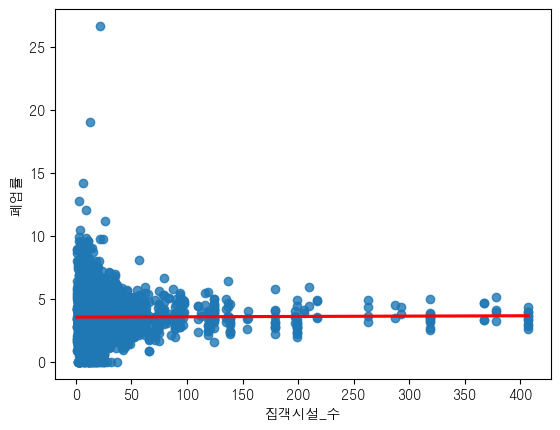

In [20]:
y = df_0['폐업률']
x = df_0['집객시설_수']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

### (7) 폐업률 - 당월_매출_금액

상관계수 : 0.01614102533647701
p-value : 0.4170609241301604


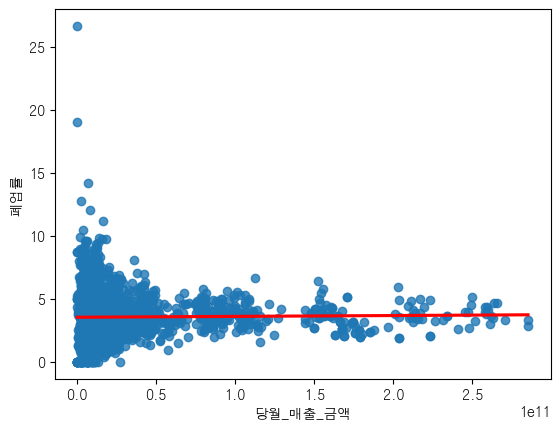

In [21]:
y = df_0['폐업률']
x = df_0['당월_매출_금액']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

### (8) 폐업률 - 총 직장인구 수

상관계수 : 0.0038077582554360287
p-value : 0.8481864632715302


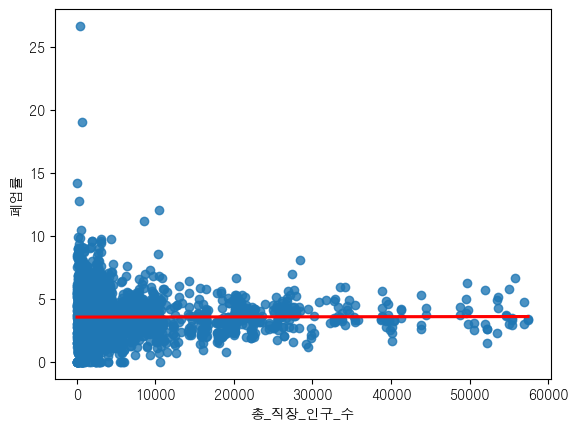

In [22]:
y = df_0['폐업률']
x = df_0['총_직장_인구_수']

sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})

cor = pearsonr(x, y)

print("상관계수 : {}\np-value : {}".format(cor[0], cor[1]))

- 모든 column이 상관관계가 약하거나 상관관계가 유의하지 않음